# Santander Value Prediction Challenge

According to Epsilon research, 80% of customers are more likely to do business with you if you provide personalized service. Banking is no exception.

The digitalization of everyday lives means that customers expect services to be delivered in a personalized and timely manner… and often before they´ve even realized they need the service. In their 3rd Kaggle competition, Santander Group aims to go a step beyond recognizing that there is a need to provide a customer a financial service and intends to determine the amount or value of the customer's transaction. This means anticipating customer needs in a more concrete, but also simple and personal way. With so many choices for financial services, this need is greater now than ever before.

In this competition, Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer. This is a first step that Santander needs to nail in order to personalize their services at scale.

# Load Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

import lightgbm as lgb
#import xgboost as xgb

from IPython.display import display # Allows the use of display() for DataFrames
import os
import warnings
warnings.filterwarnings('ignore')

# load data

You are provided with an anonymized dataset containing numeric feature variables, the numeric target column, and a string ID column.

The task is to predict the value of target column in the test set.

In [62]:
os.chdir('D:/desk/job/new york/santander')
# Read train and test files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
train_df.head(10)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,002dbeb22,2800000.0,0.0,0,0.0,0,0,0,0,0,...,12000.0,5600000.0,20000000.0,0,0,0,0,0,0,11000
6,003925ac6,164000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,40000,0,0,0
7,003eb0261,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,004b92275,979000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,4000000.0,0,0,0,0,0,0,0
9,0067b4fef,460000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,400000


In [4]:
test_df.head(10)

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0005fc190,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,000787e86,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0008510a0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,000895faf,0.0,0.0,2.461712e+07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,000986fba,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,12675000.0,...,0.0,0.0,13333333.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data summary

In [5]:
# training set
print ("Training set:")
n_data  = len(train_df)
n_features = train_df.shape[1]
print ("Number of Records: {}".format(n_data))
print ("Number of Features: {}".format(n_features))

# testing set
print ("\nTesting set:")
n_data  = len(test_df)
n_features = test_df.shape[1]
print ("Number of Records: {}".format(n_data))
print ("Number of Features: {}".format(n_features))

Training set:
Number of Records: 4459
Number of Features: 4993

Testing set:
Number of Records: 49342
Number of Features: 4992


Observations:

1.We have more Records in test data.

2.The column names are anonymized and so we do not know what they mean.

3.There are many zero values present in the data

# Data information 

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


So there are a total of 4993 features out of which 1845 are of type float64, 3147 are int64 and 1 is object (ID is the object column).

The sad thing is that, as mentioned earier, we do not have meaningful names for the features. So, we have to rely on other ways to analyze and understand the data.

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB


So there are a total of 4992 features in the test set out of which 4991 are of type float64 and 1 is object (ID is the object column)

# Data Cleaning

# Check for Missing Values

In [8]:
#### Check if there are any NULL values in Train Data
print("Total Train Features with NaN Values = " + str(train_df.columns[train_df.isnull().sum() != 0].size))
if (train_df.columns[train_df.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(train_df.columns[train_df.isnull().sum() != 0])))
    train_df[train_df.columns[train_df.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Train Features with NaN Values = 0


In [9]:
#### Check if there are any NULL values in Test Data
print("Total Test Features with NaN Values = " + str(test_df.columns[test_df.isnull().sum() != 0].size))
if (test_df.columns[test_df.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(test_df.columns[test_df.isnull().sum() != 0])))
    test_df[test_df.columns[test_df.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Test Features with NaN Values = 0


# Visualization techniques for missing value occurrence

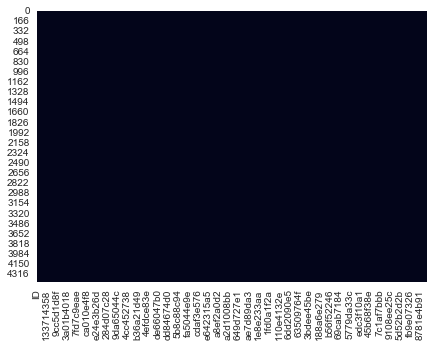

In [10]:
# Missing values in train Data
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(train_df.isnull(), cbar=False,);

There no missing value in the train dataset

# Data Preprocessing

In [11]:
X_train = train_df.drop(["ID", "target"], axis=1)
y_train = np.log1p(train_df["target"].values)

X_test = test_df.drop(["ID"], axis=1)

# Preprocess step 1:Check and Remove Constant Features

Constant values have no variance. These will provide no information to predict the target and will need to be removed.
As we have lot of features, we will look for ways to trim down on the number of features. From the above sample records we can see that many of the records and features contains 0. Also as there are many features, we will try to see if there are any features with constant values.

In [12]:
# check and remove constant columns
colsToRemove = []
for col in X_train.columns:
    if X_train[col].std() == 0: 
        colsToRemove.append(col)
        
# remove constant columns in the training set
X_train.drop(colsToRemove, axis=1, inplace=True)

# remove constant columns in the test set
X_test.drop(colsToRemove, axis=1, inplace=True) 

print("Removed `{}` Constant Columns\n".format(len(colsToRemove)))
print(colsToRemove)

Removed `256` Constant Columns

['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a7

# Preprocess step 2:Check and Remove Duplicate Columns¶

In [13]:
# Check and remove duplicate columns
colsToRemove = []
colsScaned = []
dupList = {}

columns = X_train.columns

for i in range(len(columns)-1):
    v = X_train[columns[i]].values
    dupCols = []
    for j in range(i+1,len(columns)):
        if np.array_equal(v, X_train[columns[j]].values):
            colsToRemove.append(columns[j])
            if columns[j] not in colsScaned:
                dupCols.append(columns[j]) 
                colsScaned.append(columns[j])
                dupList[columns[i]] = dupCols
                
# remove duplicate columns in the training set
X_train.drop(colsToRemove, axis=1, inplace=True) 

# remove duplicate columns in the testing set
X_test.drop(colsToRemove, axis=1, inplace=True)

print("Removed `{}` Duplicate Columns\n".format(len(dupList)))
print(dupList)

Removed `4` Duplicate Columns

{'34ceb0081': ['d60ddde1b'], '8d57e2749': ['acc5b709d', 'f333a5f60'], '168b3e5bc': ['f8d75792f'], 'a765da8bc': ['912836770']}


In [14]:
print("Train set size: {}".format(X_train.shape))
print("Test set size: {}".format(X_test.shape))

Train set size: (4459, 4730)
Test set size: (49342, 4730)


# Exploratory Data Analysis :


# 1. Distribution of Target value

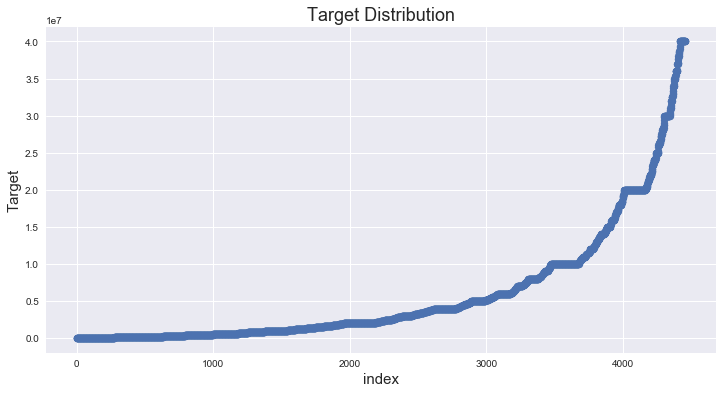

In [15]:
plt.figure(figsize = (12,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df['target'].values))
plt.xlabel('index', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Target Distribution', fontsize = 18)
plt.show()

Looks like there are not any visible outliers in the data but the range is quite high.

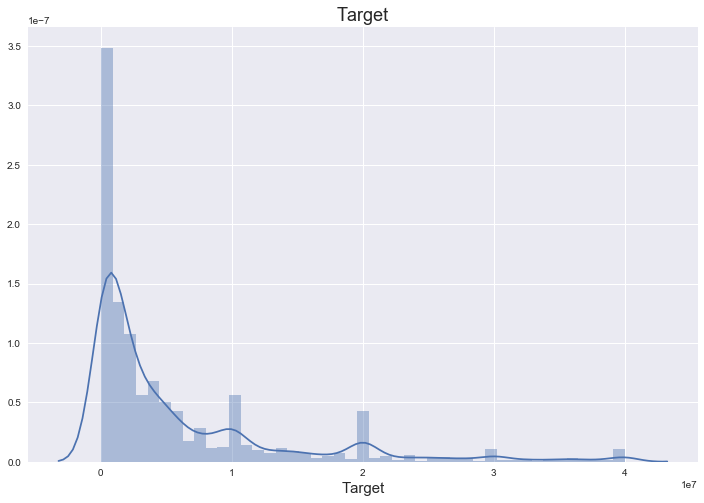

In [16]:
#plot a distribution plot to see the distribution of the target field
plt.figure(figsize=(12,8))
sns.distplot(train_df['target'])
plt.xlabel('Target', fontsize=15)
plt.title('Target', fontsize = 18)
plt.show()

This seems to be a highly left-skewed target variable. Let's take the log of it to check the distribution

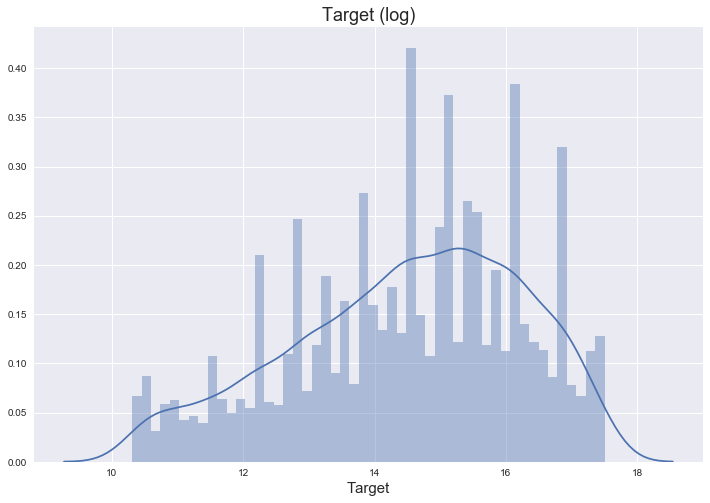

In [17]:
plt.figure(figsize = (12,8))
sns.distplot(np.log1p(train_df['target'].values), bins = 50)
plt.xlabel('Target', fontsize=15)
plt.title('Target (log)', fontsize = 18)
plt.show()

It looks much better!

# 2.Feature Importance:

As we have 4730 features it would be very difficult to visualize and analyze all of them. So, we will try to analyze only some of the top features.

# 2.1 Feature Importance from GradientBoostingRegressor


In [18]:
# Find feature importance
clf_gb = GradientBoostingRegressor(random_state = 42)
clf_gb.fit(X_train, y_train)
print(clf_gb)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)


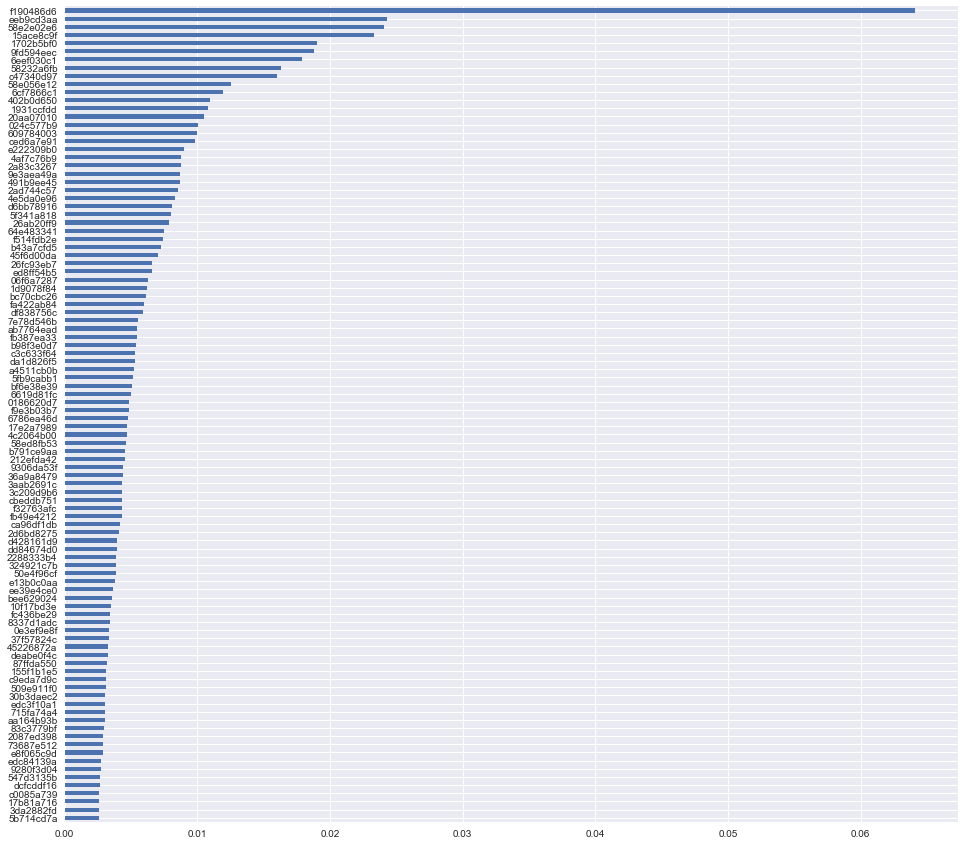

In [19]:
# GradientBoostingRegressor feature importance - top 100
feat_importances = pd.Series(clf_gb.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.nlargest(100)
plt.figure(figsize=(16,15))
feat_importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

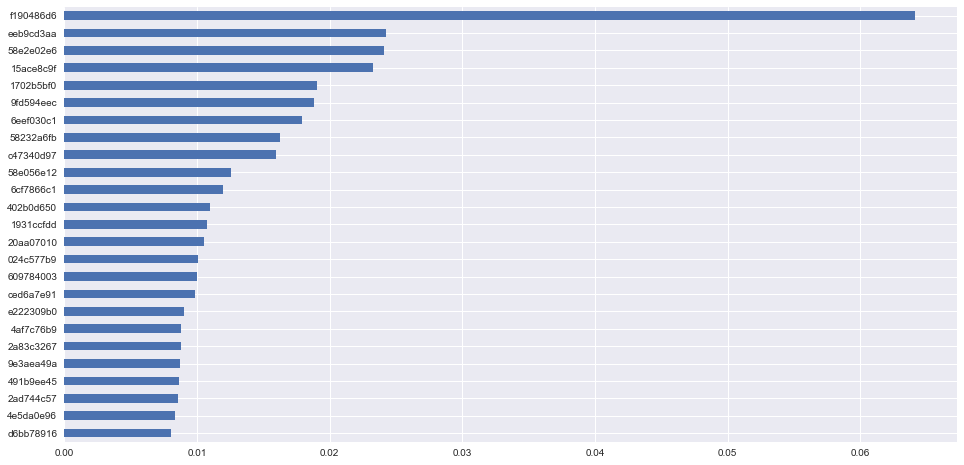

In [20]:
# GradientBoostingRegressor feature importance - top 25
feat_importances_gb = pd.Series(clf_gb.feature_importances_, index=X_train.columns)
feat_importances_gb = feat_importances_gb.nlargest(25)
plt.figure(figsize=(16,8))
feat_importances_gb.plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [21]:
print(pd.Series(clf_gb.feature_importances_, index=X_train.columns).nlargest(10))

f190486d6    0.064083
eeb9cd3aa    0.024274
58e2e02e6    0.024057
15ace8c9f    0.023274
1702b5bf0    0.019042
9fd594eec    0.018810
6eef030c1    0.017882
58232a6fb    0.016268
c47340d97    0.015974
58e056e12    0.012544
dtype: float64


# 2.2 Feature Importance from RandomForestRegressor

In [22]:
# Find feature importance
clf_rf = RandomForestRegressor(random_state = 42)
clf_rf.fit(X_train, y_train)
print(clf_rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


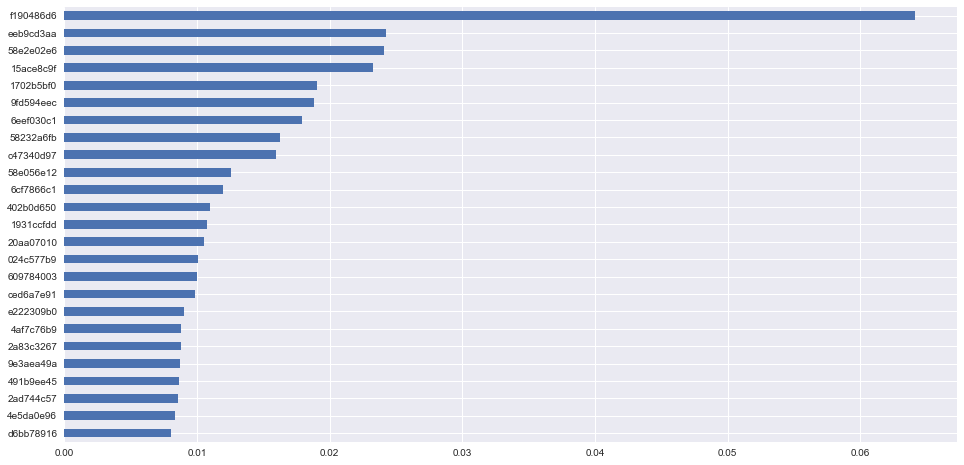

In [23]:
# RandomForestRegressor feature importance - top 25
feat_importances_rf = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
feat_importances_rf = feat_importances_rf.nlargest(25)
plt.figure(figsize=(16,8))
feat_importances_gb.plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [24]:
print(pd.Series(clf_rf.feature_importances_, index=X_train.columns).nlargest(10))

f190486d6    0.075531
eeb9cd3aa    0.033288
58e2e02e6    0.027243
9fd594eec    0.022015
20aa07010    0.019176
15ace8c9f    0.015275
994b4c2ac    0.007953
58232a6fb    0.007620
d48c08bda    0.007537
bc70cbc26    0.006568
dtype: float64


# 2.3 GradientBoostingRegressor vs RandomForestRegressor Top Features

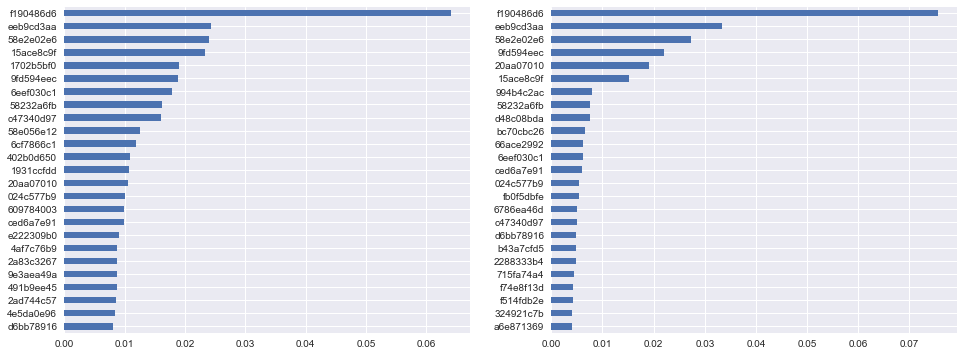

In [25]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(16,6))
feat_importances_gb.plot(kind='barh', ax=ax[0])
feat_importances_rf.plot(kind='barh', ax=ax[1])
ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.show()

In [26]:
s1 = pd.Series(clf_gb.feature_importances_, index=X_train.columns).nlargest(25).index
s2 = pd.Series(clf_rf.feature_importances_, index=X_train.columns).nlargest(25).index

common_features = pd.Series(list(set(s1).intersection(set(s2)))).values

print(common_features)
len(common_features)

['c47340d97' '9fd594eec' '15ace8c9f' 'd6bb78916' 'f190486d6' '20aa07010'
 '58e2e02e6' 'ced6a7e91' 'eeb9cd3aa' '58232a6fb' '024c577b9' '6eef030c1']


12

In Top 25 Features, both Classifier all have those 12 features:['ced6a7e91' '6eef030c1' 'c47340d97' '58e2e02e6' '9fd594eec' 'd6bb78916'
 'eeb9cd3aa' 'f190486d6' '15ace8c9f' '20aa07010' '024c577b9' '58232a6fb']

# 3.Data visualizations related to the top common features.

# 3.1Pairplot

Text(0.5,0.98,'Pairplot of Top  12 Common Important Features')

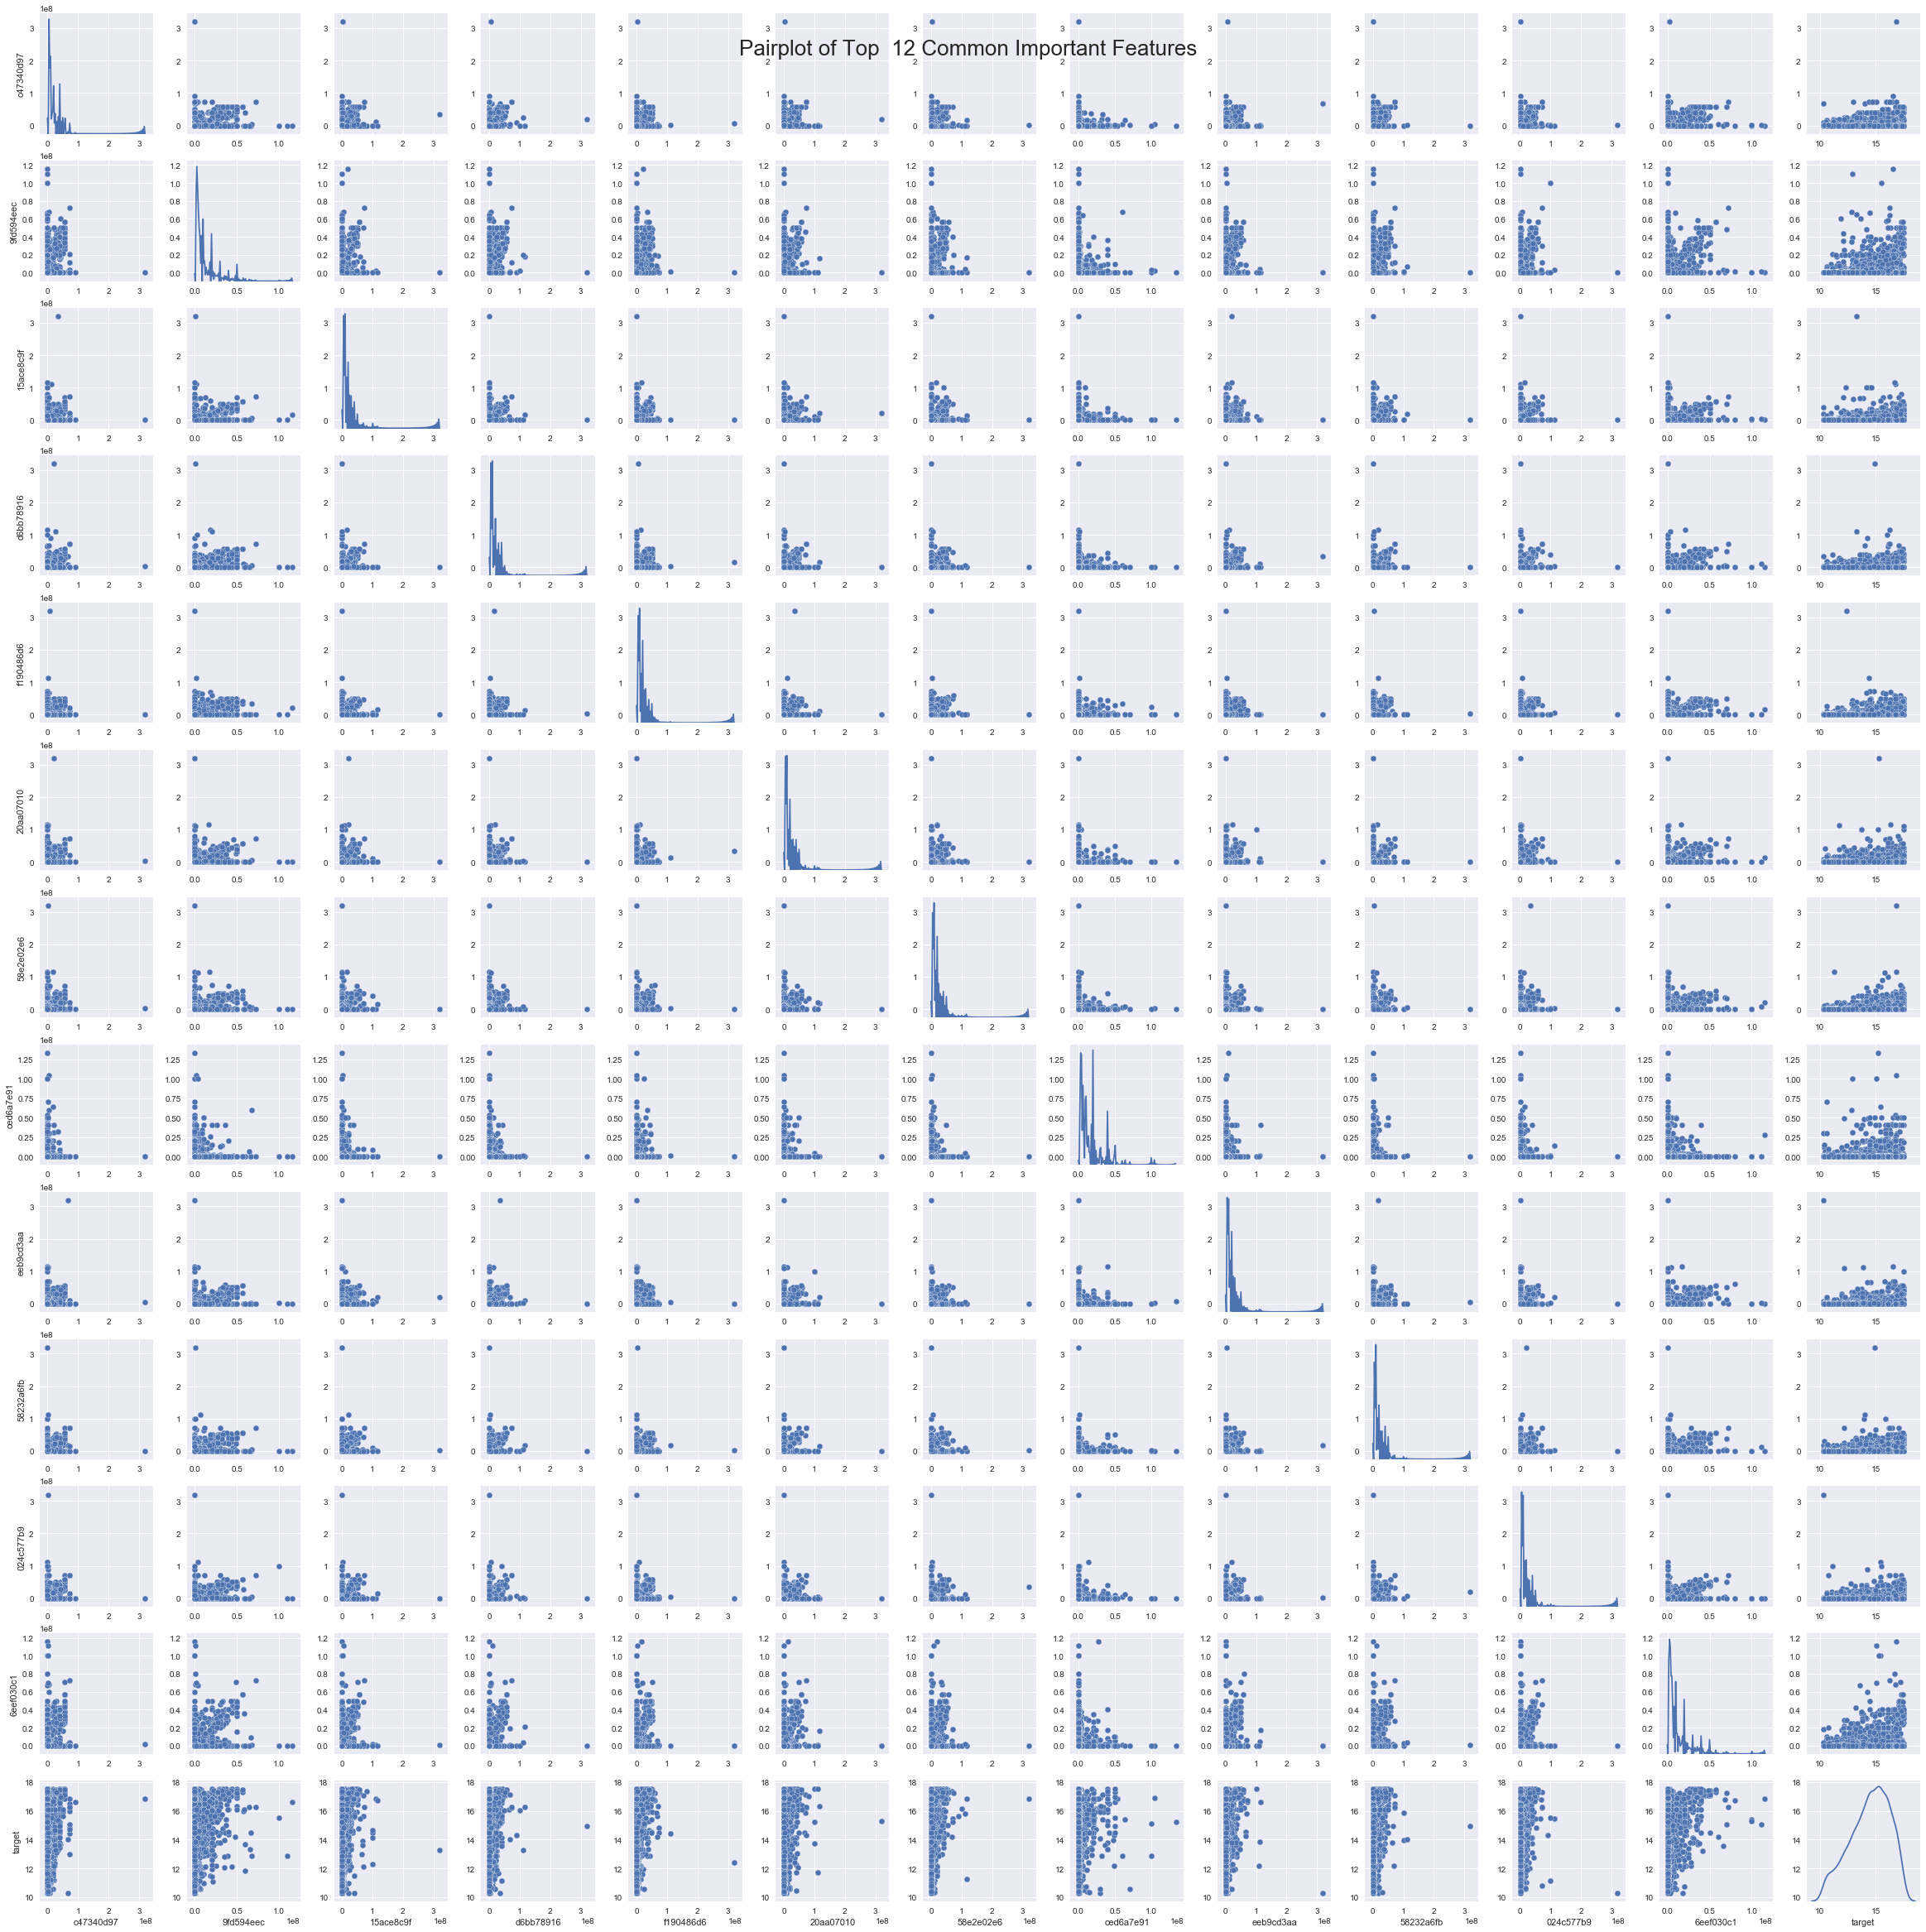

In [27]:
df_plot = X_train[common_features]
df_plot['target'] = y_train

g = sns.pairplot(df_plot, diag_kind="kde", palette="BuGn_r")
g.fig.suptitle('Pairplot of Top  12 Common Important Features',fontsize=26)

# 3.2 Correlation HeatMap

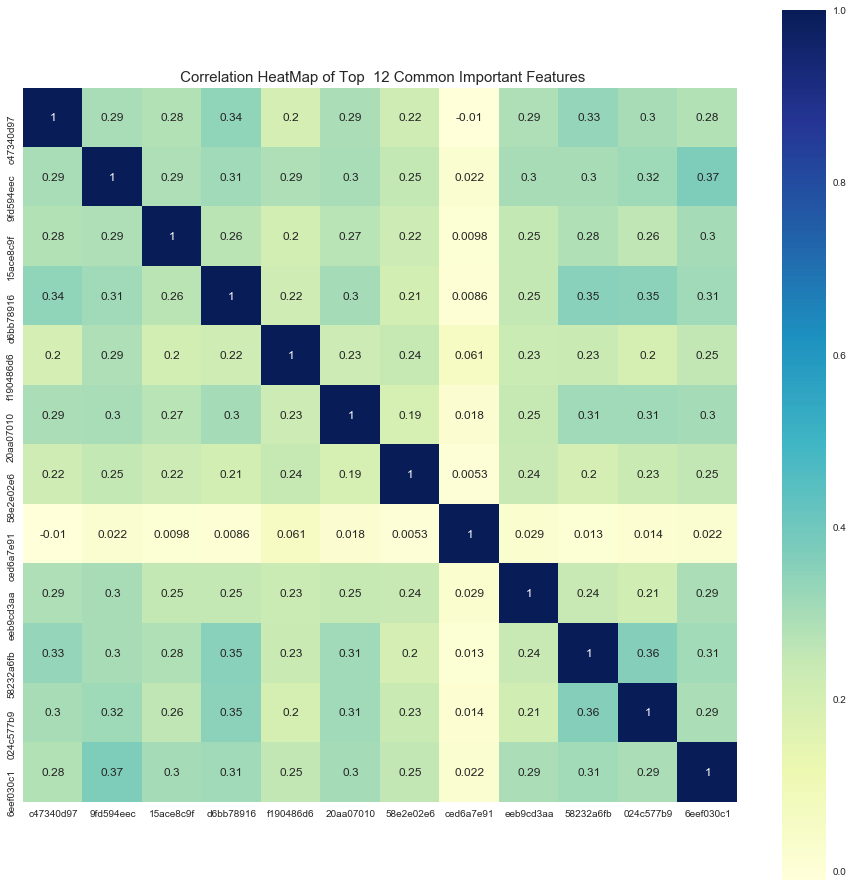

In [28]:
df_plot_1 = pd.DataFrame(X_train, columns = common_features)
corr = df_plot_1.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1., square=True, cmap="YlGnBu", annot=True)
plt.title(" Correlation HeatMap of Top  12 Common Important Features", fontsize=15)
plt.show()

There no obvious correlation between those top common features. 

# DIMENSIONALITY REDUCTION

One of the major problems with this dataset is that it has too many predictors , even after Data Preprocessing ,it still has over 4700+ predictors.To go through each of these predictors and see which ones are significant for the model is going to be a tedious task. Instead, we can use one of the all-time favourite dimensionality reduction technique - Principle Component Analysis.

# Principle Component Analysis:

Before we can use PCA, we need to STANDARDISE the data (Standardisation and Normalization are used inter-dependently. Standardisation is moulding the data to between -1 and +1 data points. Normalisation is normalising the data so that the data points lie along the mean.

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [30]:
x_train_PCA = sc.fit_transform(X_train)
x_test_PCA = sc.transform(X_test)

In [31]:
print(x_train_PCA)

[[-0.03764565 -0.02163947 -0.04688961 ..., -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ..., -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ..., -0.07234203 -0.05636327
  -0.12585201]
 ..., 
 [-0.03764565 -0.02163947 -0.04688961 ..., -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ..., -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ..., -0.07234203 -0.05636327
  -0.12585201]]


Now that the data is scaled, we shall use PCA

# PCA Visualization

Text(0.5,1,' Explained variance ratio plot')

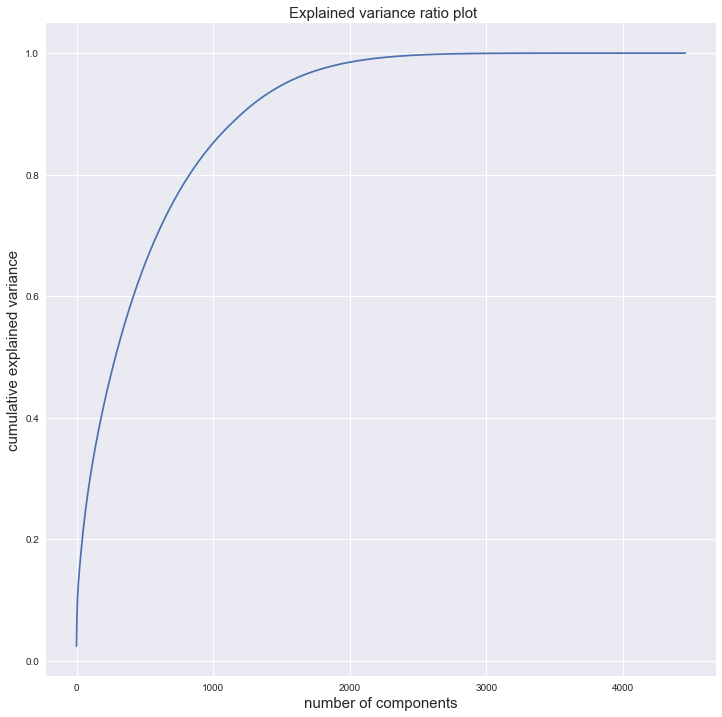

In [32]:
pca = PCA().fit(x_train_PCA)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components',fontsize=15)
plt.ylabel('cumulative explained variance',fontsize=15)
plt.title(" Explained variance ratio plot", fontsize=15)

In [33]:
from sklearn.decomposition import PCA
pca_x = PCA(0.95).fit(x_train_PCA)
print('%d components explain 95%% of the variation in data' % pca_x.n_components_)

1528 components explain 95% of the variation in data


In [34]:
pca = PCA(n_components=1528)
#fit with 1528 components on train data
pca.fit(X_train)
#transform on train data
x_train_pca_fi = pca.transform(X_train)
#transform on test data
x_test_pca_fi = pca.transform(X_test)
y_train_pca=y_train

From the above，We can see that the first 1528 Principal Components attribute for about 95% variation in the data，it seems reasonable to retain the first 1528 components. We shall use these 1528 for our prediction.

# MODELLING AND PREDICTION:

5 fold cross validation applied

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# LightGBM

Process Flow for Light GBM Regressor Training:

1.Find optimal number of rounds for a larger learning rate

2.Find optimal number of rounds for smaller learning rates

3.Find the optimal number of rounds and best parameters out of the trials above

In [36]:
num_folds = 5
folds = KFold(n_splits=num_folds, shuffle=True, random_state=0)

test_pred = np.zeros(x_test_pca_fi.shape[0])
train_pred = np.zeros(x_train_pca_fi.shape[0])


In [37]:
pca = PCA(n_components=1528)
#fit with 1528 components on train data
pca.fit(X_train)
#transform on train data
x_train_pca_fi = pca.transform(X_train)
#transform on test data
x_test_pca_fi = pca.transform(X_test)
y_train_pca=y_train

In [38]:
log_labels = np.log1p(y_train_pca)
lgtrain = lgb.Dataset(x_train_pca_fi, label=log_labels, feature_name='auto')

In [39]:
results = pd.DataFrame(columns=['Rounds', 'Score', 'STD', 'LB', 'Parameters'])

In [40]:
lgbm_params =  {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    "learning_rate": 0.01,
    "num_leaves": 200,
    "feature_fraction": 0.50,
    "bagging_fraction": 0.50,
    'bagging_freq': 4,
    "max_depth": -1,  # No limit on tree depth
    "lambda_l1": 0.3,
    "lambda_l2": 0.1,
    "min_sum_hessian_in_leaf": 10,
    'zero_as_missing': True
}

In [41]:
# Find optimal parameters / boosting rounds (larger learning rate)
lgb_cv = lgb.cv(
    params = lgbm_params,
    train_set = lgtrain,
    num_boost_round=1000,
    stratified=False,
    nfold = 5,
    verbose_eval=50,
    seed = 23,
    early_stopping_rounds=75)

[50]	cv_agg's rmse: 0.110552 + 0.0023686
[100]	cv_agg's rmse: 0.107378 + 0.00230585
[150]	cv_agg's rmse: 0.105708 + 0.00230029
[200]	cv_agg's rmse: 0.104776 + 0.00222647
[250]	cv_agg's rmse: 0.104306 + 0.00224729
[300]	cv_agg's rmse: 0.103967 + 0.00233198
[350]	cv_agg's rmse: 0.103711 + 0.00235043
[400]	cv_agg's rmse: 0.103535 + 0.00239959
[450]	cv_agg's rmse: 0.103381 + 0.00242653
[500]	cv_agg's rmse: 0.103291 + 0.00241776
[550]	cv_agg's rmse: 0.103202 + 0.00243868
[600]	cv_agg's rmse: 0.103146 + 0.00245961
[650]	cv_agg's rmse: 0.103096 + 0.00250937
[700]	cv_agg's rmse: 0.103089 + 0.00252089
[750]	cv_agg's rmse: 0.103058 + 0.00254784
[800]	cv_agg's rmse: 0.103035 + 0.00257623
[850]	cv_agg's rmse: 0.103034 + 0.0025788
[900]	cv_agg's rmse: 0.103016 + 0.00259214
[950]	cv_agg's rmse: 0.103017 + 0.00262284
[1000]	cv_agg's rmse: 0.103004 + 0.00262456


In [42]:
optimal_rounds = np.argmin(lgb_cv['rmse-mean'])
best_cv_score = min(lgb_cv['rmse-mean'])
print('Optimal Round: {}\nOptimal Score: {} + {}'.format(optimal_rounds, best_cv_score, 
                                                         lgb_cv['rmse-stdv'][optimal_rounds]))

Optimal Round: 996
Optimal Score: 0.10300007025233064 + 0.002624385990224859


In [43]:
# Append to results dataframe
results = results.append({'Rounds': optimal_rounds,
                          'Score': best_cv_score,
                          'STD': lgb_cv['rmse-stdv'][optimal_rounds],
                          'LB': None,
                          'Parameters': lgbm_params}, ignore_index=True)

In [44]:
# Find optimal parameters / boosting rounds (smaller learning rate)
learning_rates = [0.012, 0.008, 0.016]
for param in learning_rates:
    print ('Learning rate:', param)
    lgbm_params['learning_rate'] = param
    # Get cross validated results
    lgb_cv = lgb.cv(
        params = lgbm_params,
        train_set = lgtrain,
        num_boost_round= 500,
        stratified= False,
        nfold = 5,
        verbose_eval= 200,
        seed = 23,
        early_stopping_rounds= 75)
    optimal_rounds = np.argmin(lgb_cv['rmse-mean'])
    best_cv_score = min(lgb_cv['rmse-mean'])
    print('Optimal Round: {}\nOptimal Score: {} + {}'.format(optimal_rounds, best_cv_score, 
                                                         lgb_cv['rmse-stdv'][optimal_rounds]))
    # Append results to results dataframe
    results = results.append({'Rounds': optimal_rounds,
                              'Score': best_cv_score,
                              'STD': lgb_cv['rmse-stdv'][optimal_rounds],
                              'LB': None,
                              'Parameters': lgbm_params}, ignore_index=True)

Learning rate: 0.012
[200]	cv_agg's rmse: 0.10456 + 0.00229768
[400]	cv_agg's rmse: 0.103671 + 0.00247517
Optimal Round: 497
Optimal Score: 0.1035006449170475 + 0.002493319688156766
Learning rate: 0.008
[200]	cv_agg's rmse: 0.105577 + 0.00228058
[400]	cv_agg's rmse: 0.104036 + 0.00243386
Optimal Round: 499
Optimal Score: 0.10375463283270817 + 0.002468069405396975
Learning rate: 0.016
[200]	cv_agg's rmse: 0.103994 + 0.00198822
[400]	cv_agg's rmse: 0.103505 + 0.00216738
Optimal Round: 493
Optimal Score: 0.10335397465102639 + 0.0022469124603853065


In [45]:
final_model_params = results.iloc[results['Score'].idxmin(), :]['Parameters']
optimal_rounds = results.iloc[results['Score'].idxmin(), :]['Rounds']

In [47]:
final_model_params


{'task': 'train',
 'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'learning_rate': 0.016,
 'num_leaves': 200,
 'feature_fraction': 0.5,
 'bagging_fraction': 0.5,
 'bagging_freq': 4,
 'max_depth': -1,
 'lambda_l1': 0.3,
 'lambda_l2': 0.1,
 'min_sum_hessian_in_leaf': 10,
 'zero_as_missing': True,
 'verbose': 1}

# Train LightGBM:

1. Using the final model parameter

2. 5 fold cross validation applied

In [52]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = final_model_params
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=200, evals_result=evals_result)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [54]:
# Begin iteration over folds
for i, (trn, val) in enumerate(folds.split(x_train_pca_fi)):
    print ('Iterating on fold %s...'%i)
    # Define parameters
    params = final_model_params
    # Define LGB datasets
    dtrain = lgb.Dataset(x_train_pca_fi[trn], np.log1p(y_train_pca[trn]))
    dval = lgb.Dataset(x_train_pca_fi[val], np.log1p(y_train_pca[val]))
    # Train model
    model = lgb.train(params=params,
                      train_set = dtrain,
                      valid_sets = dval,
                      num_boost_round = 2000,
                      early_stopping_rounds = 100,
                      verbose_eval = 200)
    # Update predictions
    test_pred += np.expm1(model.predict(x_test_pca_fi, num_iteration = model.best_iteration))
    train_pred[val] = model.predict(x_train_pca_fi[val], num_iteration = model.best_iteration)
    # Find validation error
    val_error = np.sqrt(mean_squared_error(np.log1p(y_train_pca[val]), train_pred[val]))
    print ('Validation error for %s fold is: %f'%(i, val_error))

Iterating on fold 0...
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 0.101293
[400]	valid_0's rmse: 0.100422
Early stopping, best iteration is:
[465]	valid_0's rmse: 0.10037
Validation error for 0 fold is: 0.100370
Iterating on fold 1...
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 0.107687
[400]	valid_0's rmse: 0.106825
[600]	valid_0's rmse: 0.106536
[800]	valid_0's rmse: 0.106485
Early stopping, best iteration is:
[764]	valid_0's rmse: 0.106429
Validation error for 1 fold is: 0.106429
Iterating on fold 2...
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 0.102315
Early stopping, best iteration is:
[286]	valid_0's rmse: 0.101963
Validation error for 2 fold is: 0.101963
Iterating on fold 3...
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 0.102048
Early stopping, best iteration is:
[271]	valid_0's rmse: 0.101686
Validation error for 3

In [59]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
pred_test_full = 0
for dev_index, val_index in kf.split(x_train_pca_fi):
    dev_X, val_X = x_train_pca_fi[dev_index,:], x_train_pca_fi[val_index,:]
    dev_y, val_y = y_train_pca[dev_index], y_train_pca[val_index]
    pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, x_test_pca_fi)
    pred_test_full += pred_test
pred_test_full /= 5.
pred_test_full = np.expm1(pred_test_full)

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.49887
Early stopping, best iteration is:
[294]	valid_0's rmse: 1.49057
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.54753
[400]	valid_0's rmse: 1.53911
Early stopping, best iteration is:
[436]	valid_0's rmse: 1.53874
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.55133
[400]	valid_0's rmse: 1.55059
Early stopping, best iteration is:
[305]	valid_0's rmse: 1.54754
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.59248
Early stopping, best iteration is:
[241]	valid_0's rmse: 1.58872
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.53812
[400]	valid_0's rmse: 1.52811
[600]	valid_0's rmse: 1.52689
Early stopping, best iteration is:
[536]	valid_0's rmse: 1.52541


In [56]:
len(test_pred)

49342

In [61]:
pred_test_full

array([ 3390071.81832581,   788104.45349321,  2497685.05771248, ...,
        1661443.47129165,  1308489.84110096,  1695454.05638849])

# Submit

In [63]:
# Making a submission file #
sub_df = pd.DataFrame({"ID":test_df["ID"].values})
sub_df["target"] = pred_test_full
sub_df.to_csv("sub_lgb.csv", index=False)

In [64]:
# Making a submission file #
sub_df_1 = pd.DataFrame({"ID":test_df["ID"].values})
sub_df_1["target"] = test_pred
sub_df.to_csv("sub_lgb_1.csv", index=False)